In [62]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import cmp_to_key
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import time

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv(r'C:\Users\hey\OneDrive\Bureau\solor power\Solar.csv')
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000
1,01.01.2017-01:00,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000
2,01.01.2017-02:00,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000
3,01.01.2017-03:00,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000
4,01.01.2017-04:00,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000


In [64]:
#convert string to float
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Sort the correlation values with 'SystemProduction' column
sorted_correlations = correlation_matrix['SystemProduction'].sort_values(ascending=False).to_frame()

print(sorted_correlations)

                     SystemProduction
SystemProduction           1.00000000
Radiation                  0.78571664
Sunshine                   0.56422757
AirTemperature             0.48040739
WindSpeed                  0.19565040
AirPressure               -0.00448716
RelativeAirHumidity       -0.54525159


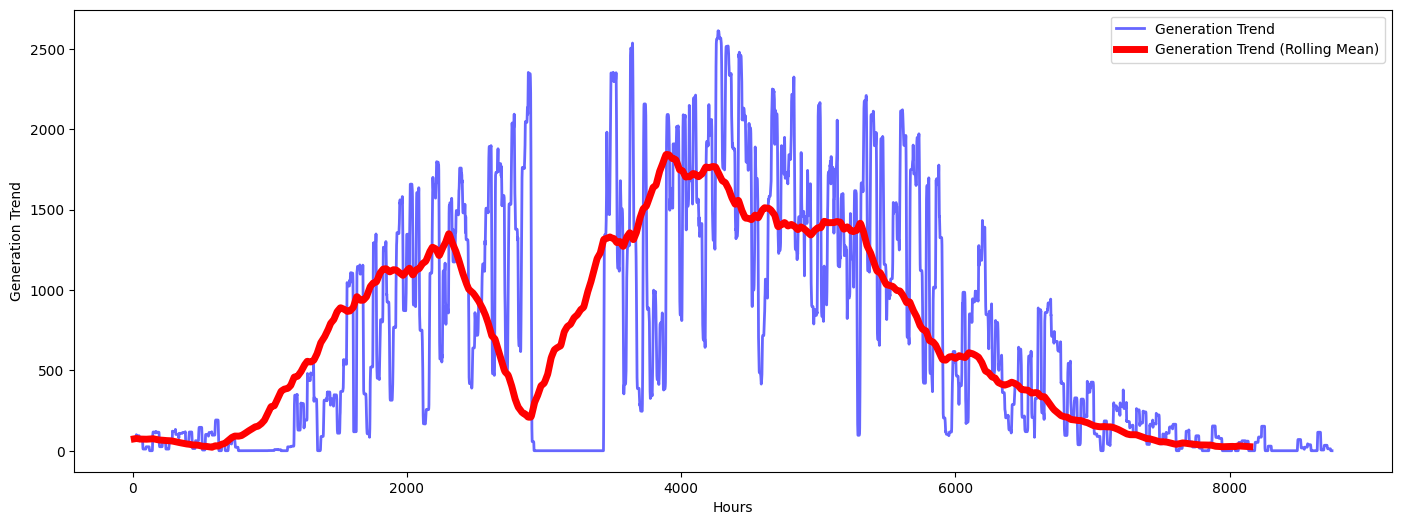

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

decomposed_results = seasonal_decompose(df["SystemProduction"], period=24)

fig, ax = plt.subplots(figsize=(17, 6))
ax.plot(decomposed_results.trend, alpha=0.6, color='Blue', label='Generation Trend', linewidth = 2.0)
ax.plot(decomposed_results.trend.rolling(600).mean().shift(-600), alpha=1, color='Red', label='Generation Trend (Rolling Mean)', linewidth = 5.0)
ax.legend(loc='best')
ax.set_ylabel("Generation Trend")
ax.set_xlabel("Hours")
plt.show()

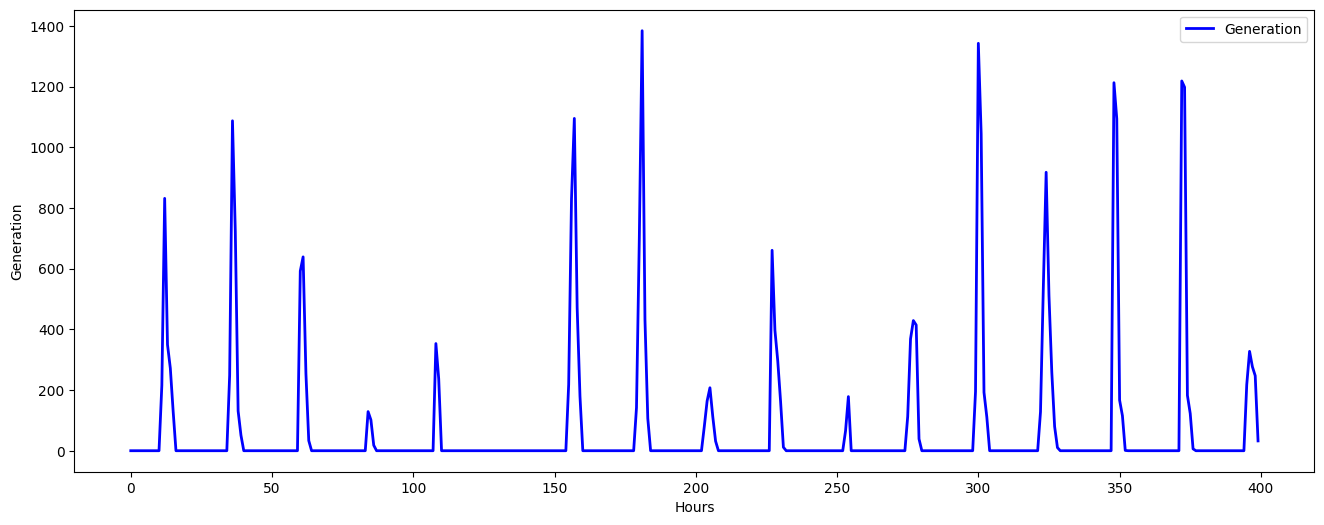

In [66]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df["SystemProduction"][:400], alpha=1, color='blue', label='Generation', linewidth = 2.0)
ax.legend(loc='best')
ax.set_ylabel("Generation")
ax.set_xlabel("Hours")
plt.show()

In [67]:
df_new = df.iloc[0:24 , 0:10]
df_new

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000
1,01.01.2017-01:00,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000
2,01.01.2017-02:00,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000
3,01.01.2017-03:00,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000
4,01.01.2017-04:00,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000
5,01.01.2017-05:00,1.40000000,0,1003.10000000,-6.80000000,1.50000000,74,0.00000000
6,01.01.2017-06:00,1.40000000,0,1003.70000000,-7.00000000,0.40000000,79,0.00000000
7,01.01.2017-07:00,1.30000000,0,1003.90000000,-7.00000000,-0.90000000,81,0.00000000
8,01.01.2017-08:00,0.60000000,0,1004.30000000,-6.60000000,-1.00000000,77,0.00000000
9,01.01.2017-09:00,0.60000000,0,1004.80000000,-6.50000000,-2.00000000,81,0.00000000


In [68]:
df['Dates'] = pd.to_datetime(df['Date-Hour(NMT)'], dayfirst=True).dt.date
df['Hour'] = pd.to_datetime(df['Date-Hour(NMT)'], dayfirst=True).dt.time
df['Day'] = pd.to_datetime(df['Date-Hour(NMT)'], dayfirst=True).dt.day
df['Month'] = pd.to_datetime(df['Date-Hour(NMT)'], dayfirst=True).dt.month
df['Year'] = pd.to_datetime(df['Date-Hour(NMT)'], dayfirst=True).dt.year

df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year
0,01.01.2017-00:00,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,00:00:00,1,1,2017
1,01.01.2017-01:00,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,01:00:00,1,1,2017
2,01.01.2017-02:00,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,02:00:00,1,1,2017
3,01.01.2017-03:00,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,03:00:00,1,1,2017
4,01.01.2017-04:00,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,04:00:00,1,1,2017


In [69]:
df["Hour"] = df["Hour"].astype(str)
df['Hour'] = df['Hour'].str.slice(stop=2)
df['Hour'] = df['Hour'].apply(lambda x: x.replace(':', '')).astype(int)
df["Season"] = [ "Winter" if i < 3 or i > 11 else "Spring" if 3 <= i < 6 else "Summer" if 6 <= i < 9 else "Autumn" for i in df["Month"]]
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season
0,01.01.2017-00:00,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,Winter
1,01.01.2017-01:00,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,1,1,1,2017,Winter
2,01.01.2017-02:00,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,2,1,1,2017,Winter
3,01.01.2017-03:00,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,3,1,1,2017,Winter
4,01.01.2017-04:00,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,4,1,1,2017,Winter


In [70]:
df_DnN = df.groupby(["Season", "Hour","SystemProduction"], as_index = False)["SystemProduction"].mean().sort_values(by="Hour",ascending = False)
table = pd.pivot_table(df_DnN, values = "SystemProduction", columns = "Season", index = "Hour", aggfunc = np.mean )
table

Season,Autumn,Spring,Summer,Winter
Hour,,,,
0,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000
5,0.00000000,0.00000000,55.75000000,0.00000000
6,0.00000000,85.16664000,129.37280789,0.00000000
7,0.00000000,240.83332500,304.49285571,0.00000000
8,99.78473333,326.01458500,579.79544886,0.00000000


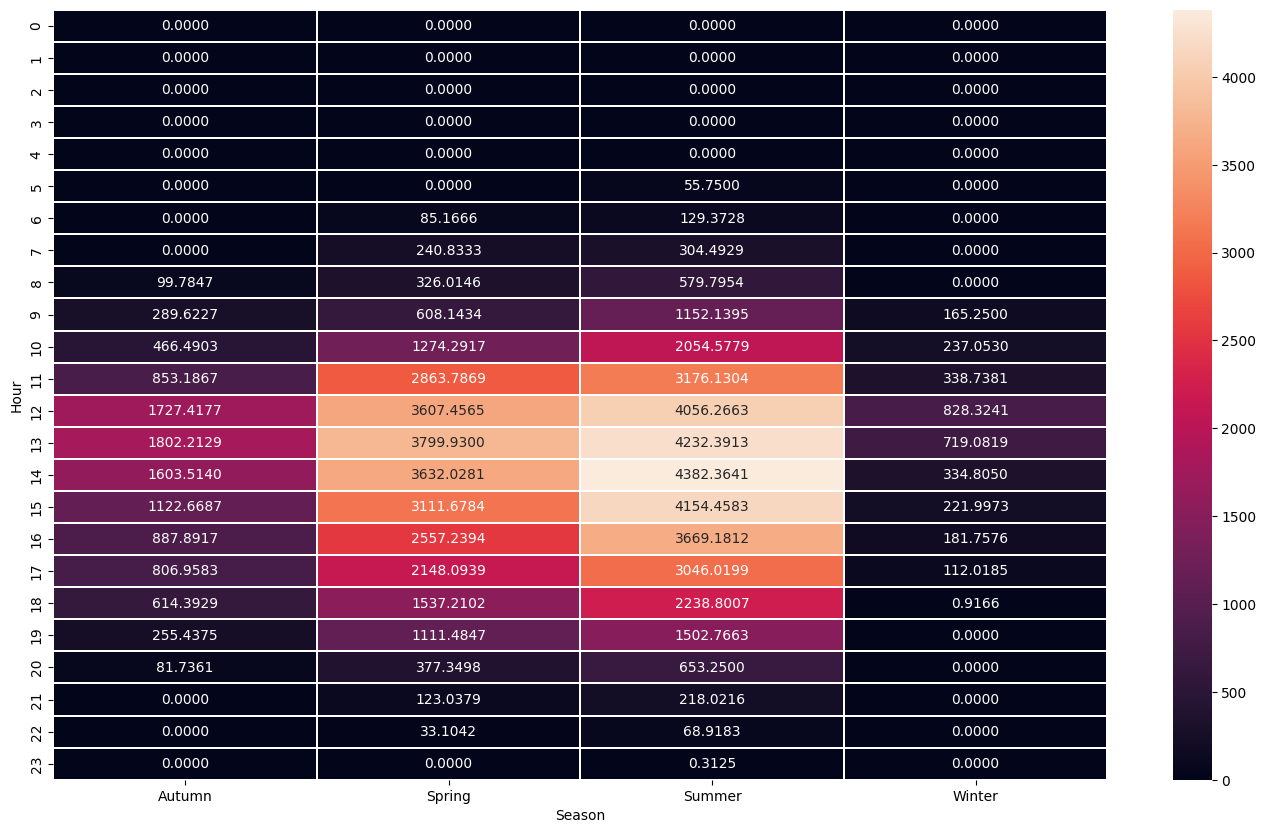

In [71]:
plt.figure(figsize=(17,10))
sns.heatmap(table, annot = True, fmt = ".4f", linewidth = 0.2 ); #


In [72]:
df.loc[((df["Hour"] > 7) & (df['Hour'] < 18)) & (df['Season']=='Winter'), 'Time'] = 'Day' 
df.loc[((df["Hour"] > 5) & (df['Hour'] < 19)) & (df['Season']=='Spring'), 'Time'] = 'Day' 
df.loc[((df["Hour"] > 5) & (df['Hour'] < 20)) & (df['Season']=='Summer'), 'Time'] = 'Day' 
df.loc[((df["Hour"] > 6) & (df['Hour'] < 18)) & (df['Season']=='Autumn'), 'Time'] = 'Day' 
df.loc[((df["Hour"] <= 7) | (df['Hour'] >= 18)) & (df['Season']=='Winter'), 'Time'] = 'Night'
df.loc[((df["Hour"] <= 5) | (df['Hour'] >= 19)) & (df['Season']=='Spring'), 'Time'] = 'Night' 
df.loc[((df["Hour"] <= 5) | (df['Hour'] >= 20)) & (df['Season']=='Summer'), 'Time'] = 'Night' 
df.loc[((df["Hour"] <= 6) | (df['Hour'] >= 18)) & (df['Season']=='Autumn'), 'Time'] = 'Night' 

df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season,Time
0,01.01.2017-00:00,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,Winter,Night
1,01.01.2017-01:00,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,1,1,1,2017,Winter,Night
2,01.01.2017-02:00,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,2,1,1,2017,Winter,Night
3,01.01.2017-03:00,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,3,1,1,2017,Winter,Night
4,01.01.2017-04:00,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,4,1,1,2017,Winter,Night


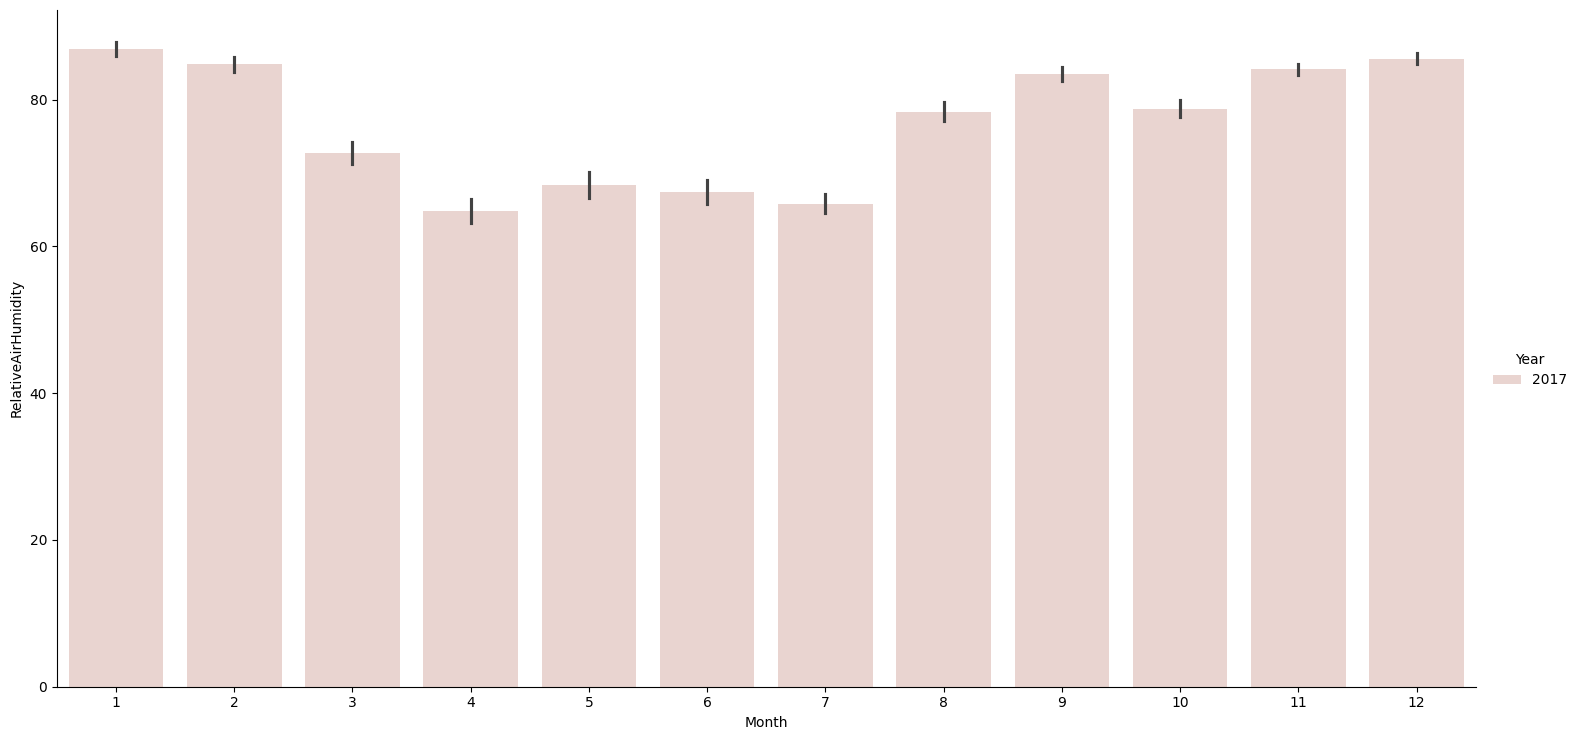

In [73]:
sns.catplot(data = df, x = "Month", y = "RelativeAirHumidity", hue = "Year", kind = "bar", height = 7.5, aspect = 2);

In [74]:
# Group by and calculate mean
df_humi = df.groupby(["Radiation", "SystemProduction", "Year", "Season"], as_index=False)[["Radiation", "SystemProduction"]].mean().reset_index()

# Sort values by "Season"
df_humi = df_humi.sort_values(by="Season", ascending=False)

# Create a pivot table
table2 = pd.pivot_table(df_humi, values=["Radiation", "SystemProduction"], index=["Season", "Year"])

# Display the pivot table
print(table2)

               Radiation  SystemProduction
Season Year                               
Autumn 2017 105.32761117      793.23103868
Spring 2017 225.47119013     1335.73385312
Summer 2017 259.87495452     1973.67775876
Winter 2017  55.71507293      220.55962998


In [75]:
df.loc[(df["RelativeAirHumidity"] >= 60.), "Humidity"] = 'Wet' 
df.loc[(df["RelativeAirHumidity"] < 60.), "Humidity"] = 'Dry'
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season,Time,Humidity
0,01.01.2017-00:00,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,Winter,Night,Wet
1,01.01.2017-01:00,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,1,1,1,2017,Winter,Night,Wet
2,01.01.2017-02:00,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,2,1,1,2017,Winter,Night,Wet
3,01.01.2017-03:00,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,3,1,1,2017,Winter,Night,Wet
4,01.01.2017-04:00,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,4,1,1,2017,Winter,Night,Wet


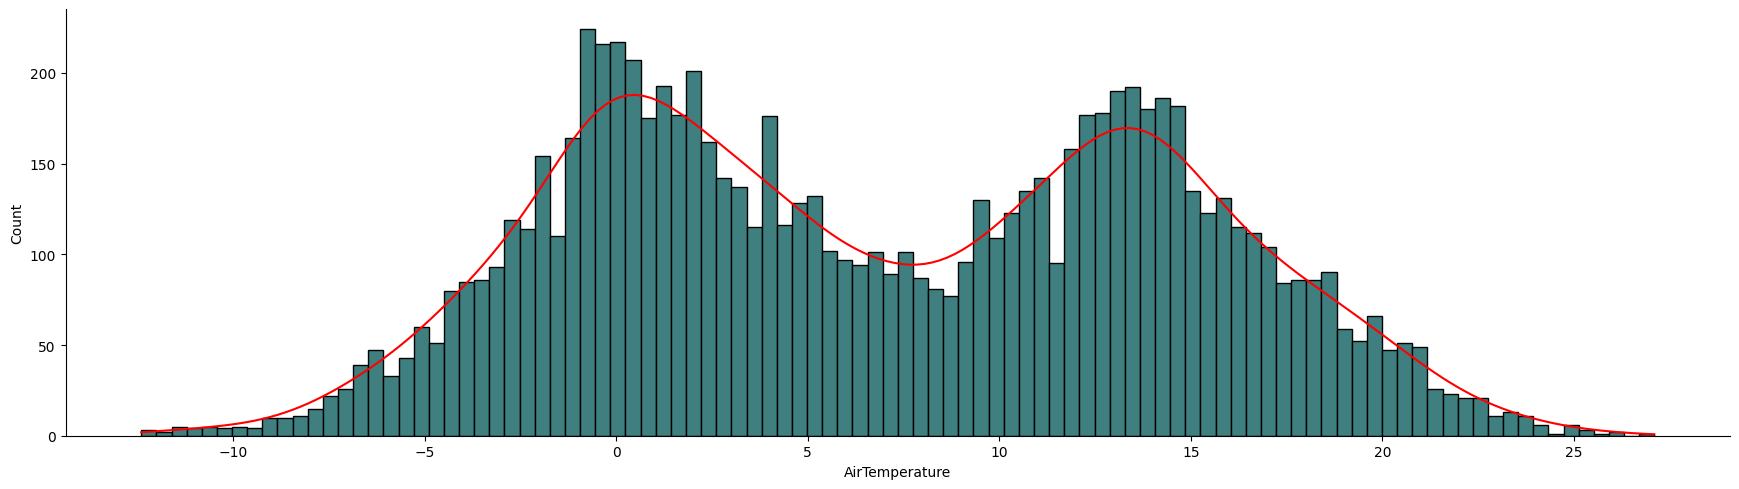

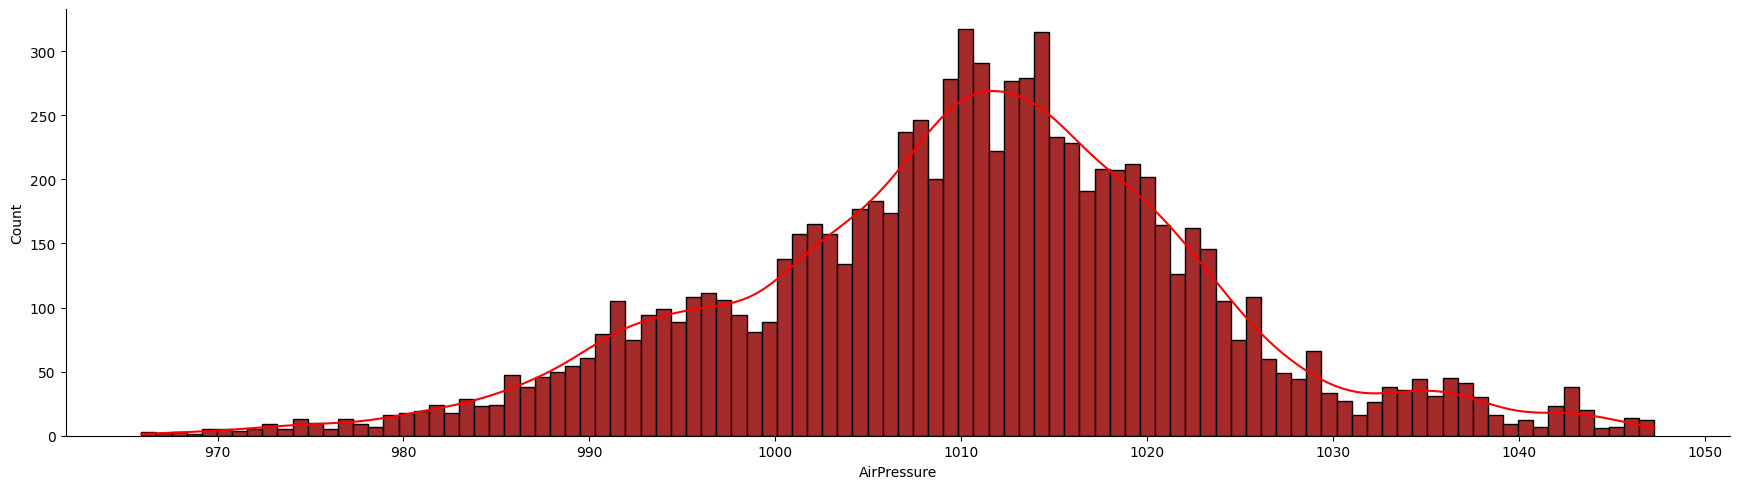

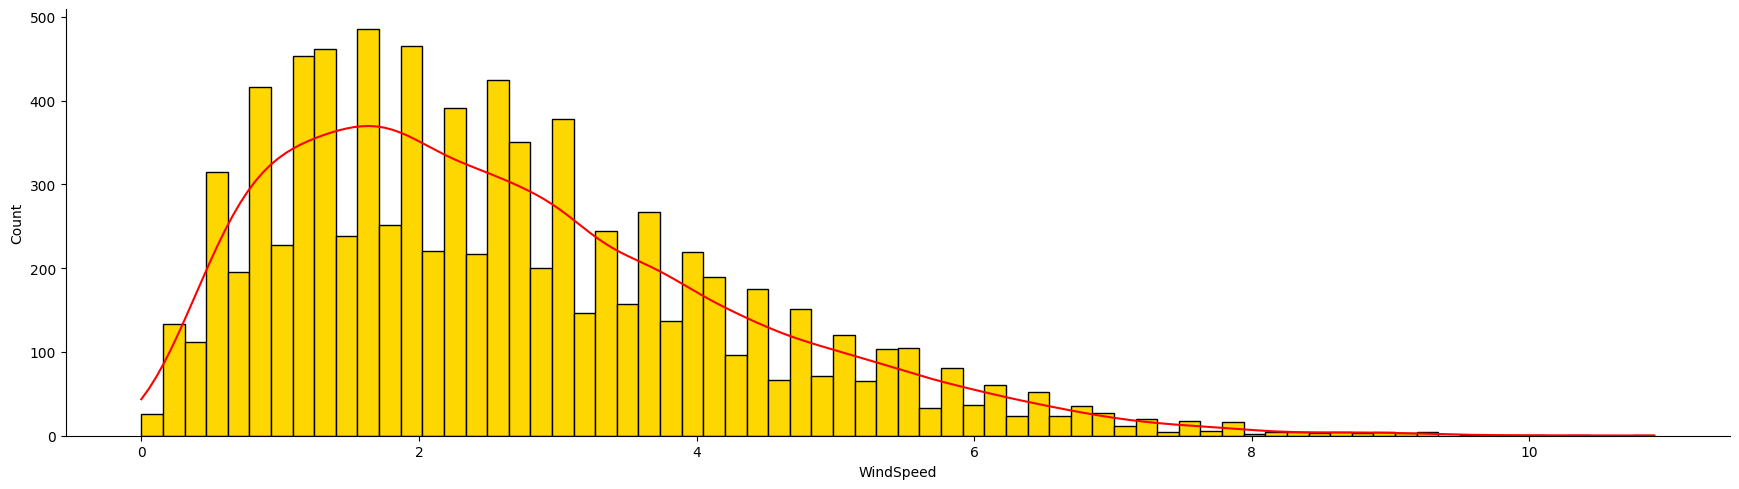

In [76]:
sns.displot(data=df, x="AirTemperature", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

sns.displot(data=df, x="AirPressure", kde=True, bins = 100,color = "red", facecolor = "Brown",height = 5, aspect = 3.5);

sns.displot(data=df, x="WindSpeed", kde=True, bins = 70,color = "red", facecolor = "Gold",height = 5, aspect = 3.5);

In [77]:
df = df.drop(['Date-Hour(NMT)'],axis=1)
df.head(1)

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season,Time,Humidity
0,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,Winter,Night,Wet


In [78]:
!pip install category_encoders


In [79]:
import category_encoders as ce 

encoder = ce.OrdinalEncoder(cols=['Season','Time','Humidity'])
df = encoder.fit_transform(df)
df.head() 

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season,Time,Humidity
0,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,1,1,1
1,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,1,1,1,2017,1,1,1
2,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,2,1,1,2017,1,1,1
3,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,3,1,1,2017,1,1,1
4,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,4,1,1,2017,1,1,1


In [80]:
X = df.drop(['SystemProduction'],axis=1)
y = df['SystemProduction']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)
df['date_year'] = df['Year']
df['date_month'] = df['Month']
df['date_hour'] = df['Day']

df.loc[df.date_month.isin([12,1,2]),"date_season"] = "Autom"
df.loc[df.date_month.isin([3,4,5]), "date_season"] = "Summer"
df.loc[df.date_month.isin([6,7,8]), "date_season"] = "Rain"
df.loc[df.date_month.isin([9,10,11]),"date_season"] = "Winter"

df.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season,Time,Humidity,date_year,date_month,date_hour,date_season
0,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,1,1,1,2017,1,1,Autom
1,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,1,1,1,2017,1,1,1,2017,1,1,Autom
2,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,2,1,1,2017,1,1,1,2017,1,1,Autom
3,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,3,1,1,2017,1,1,1,2017,1,1,Autom
4,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,4,1,1,2017,1,1,1,2017,1,1,Autom


In [82]:
df['date_season'].value_counts()

date_season
Summer    2208
Rain      2208
Winter    2184
Autom     2160
Name: count, dtype: int64

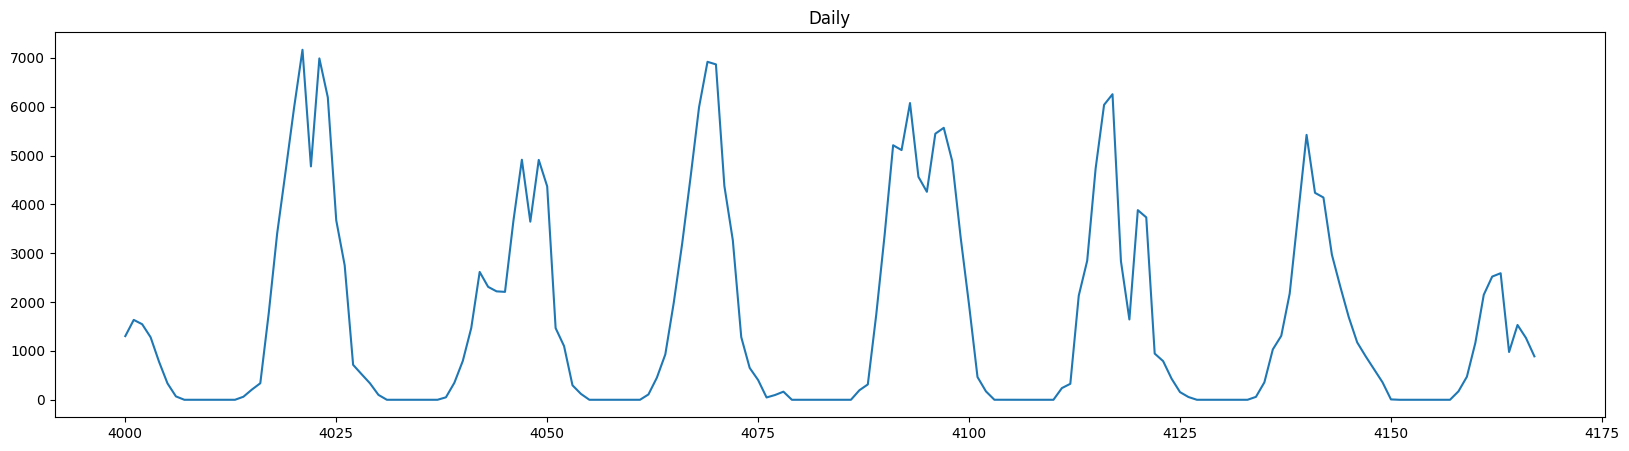

In [83]:
# Weekly power Generation
plt.figure(figsize=(20, 5))
plt.title("Daily")
df[4000:4000+7*24].SystemProduction.plot();

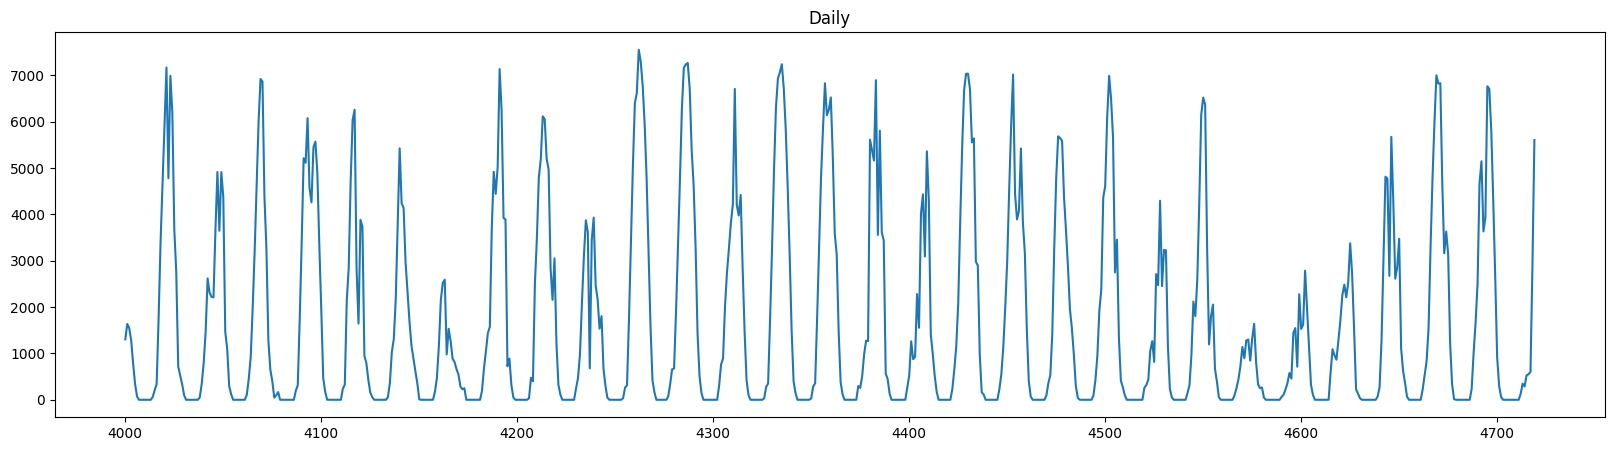

In [84]:
# Monthly power Generation
plt.figure(figsize=(20, 5))
plt.title("Daily")
df[4000:4000+30*24].SystemProduction.plot();

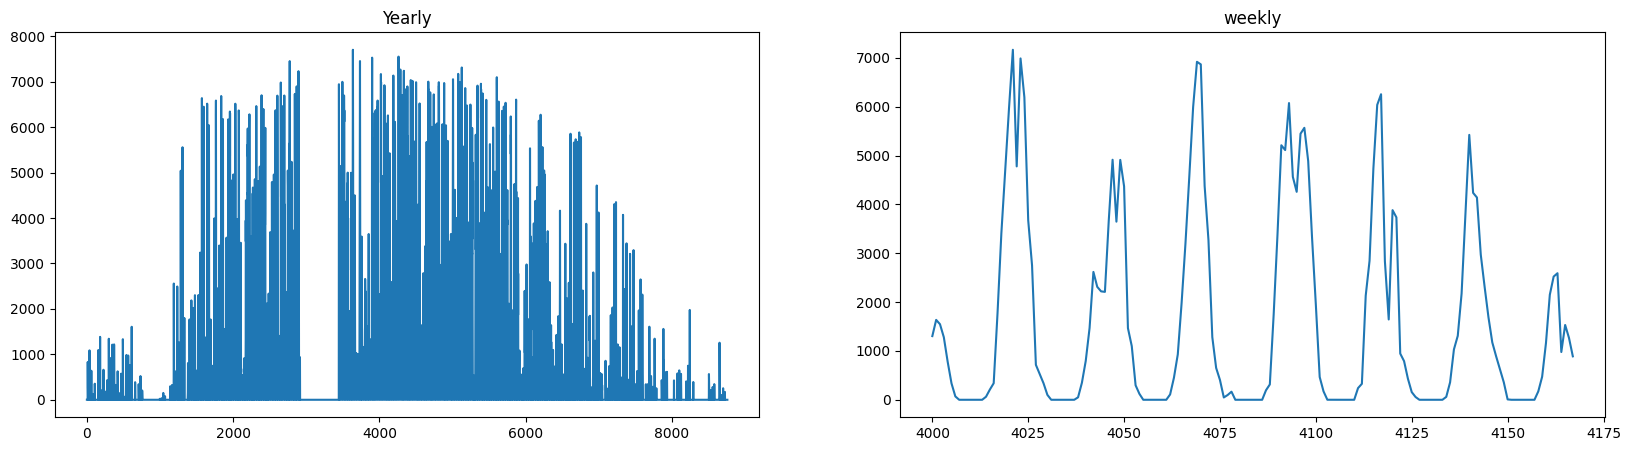

In [85]:
plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Yearly")
df.SystemProduction.plot()
plt.subplot(1, 2, 2)
plt.title("weekly")
df[4000:4000+7*24].SystemProduction.plot();

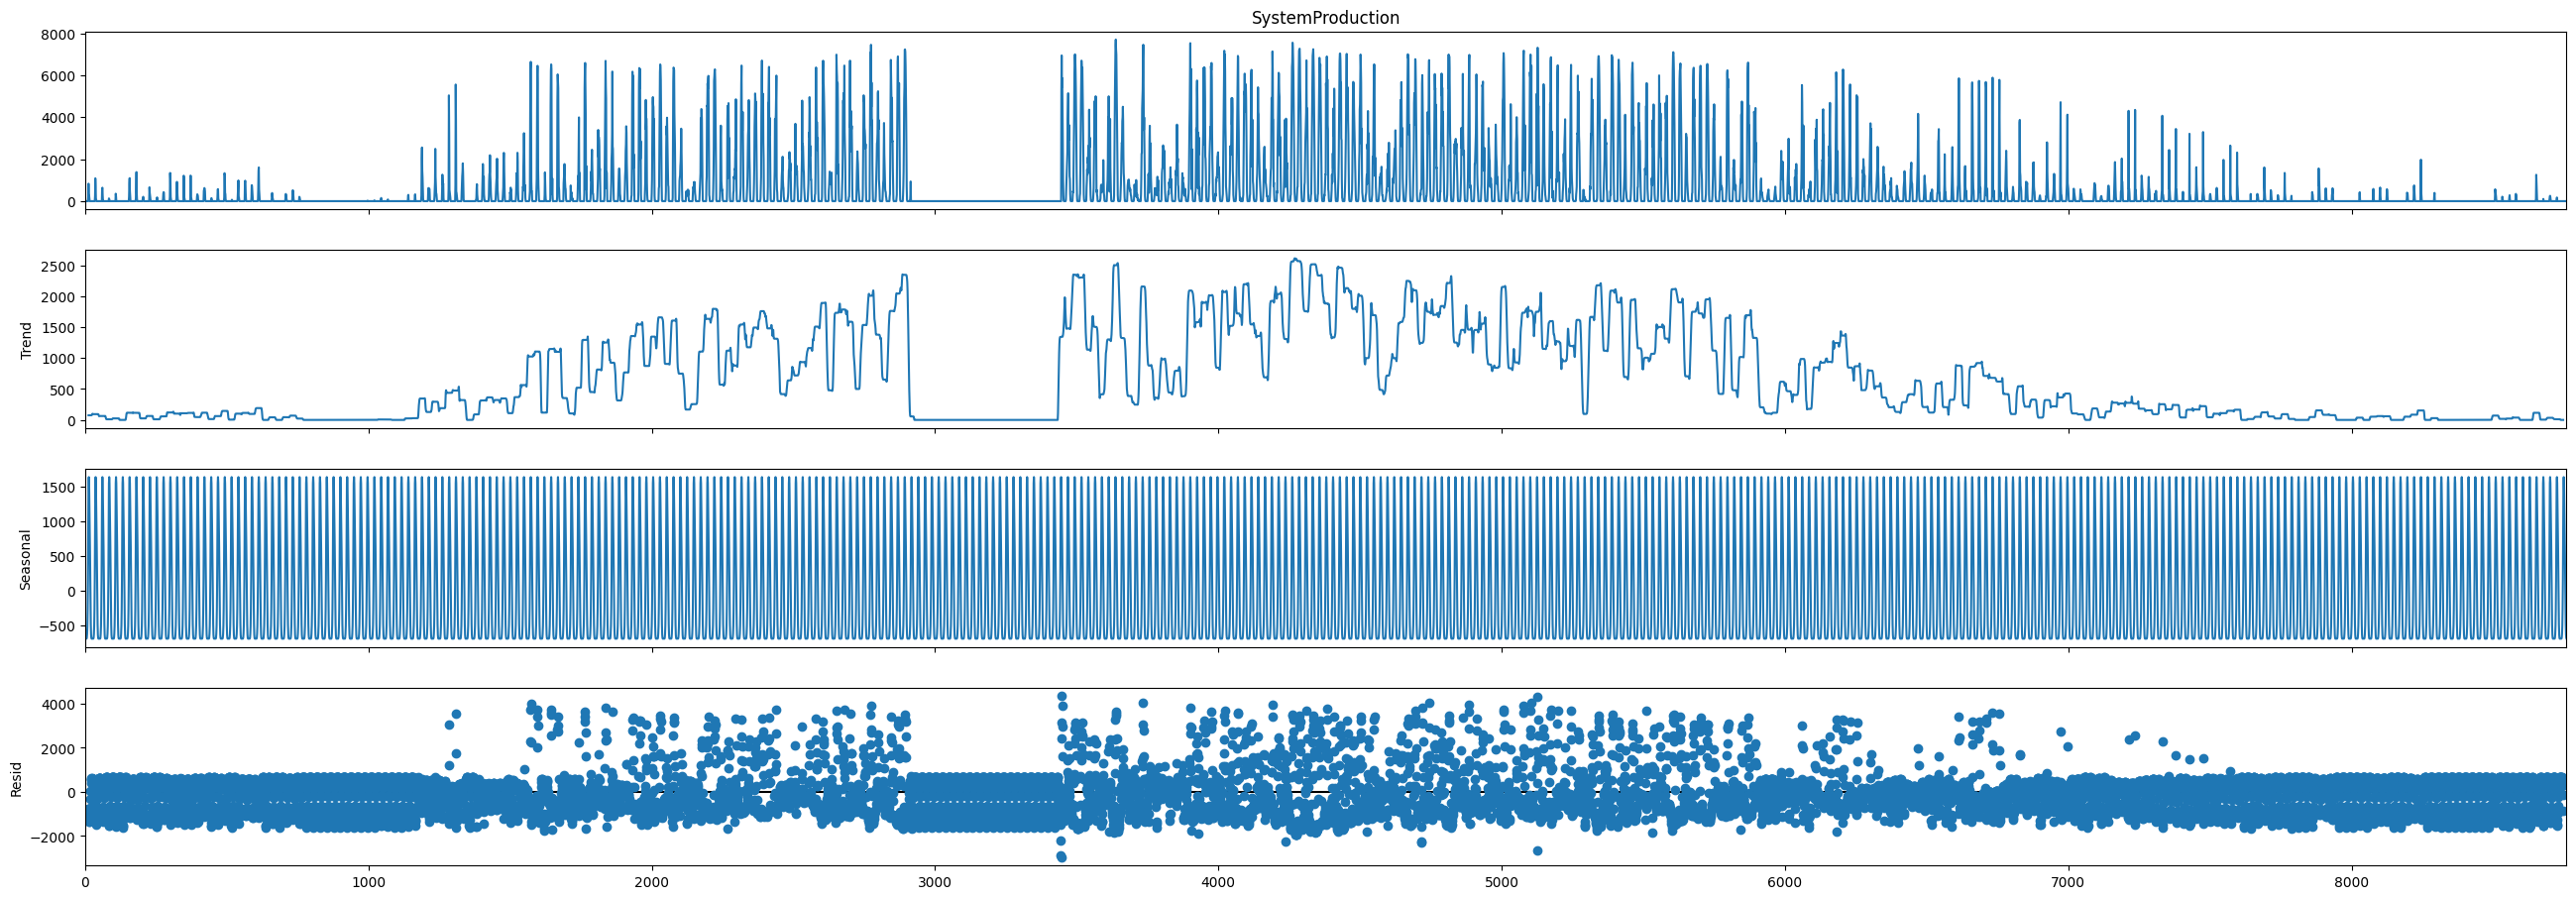

In [86]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.8f' % x)
decomposition = sm.tsa.seasonal_decompose(df["SystemProduction"][:10000], period=24)
fig = decomposition.plot()
fig.set_figwidth(30)
fig.set_figheight(10)

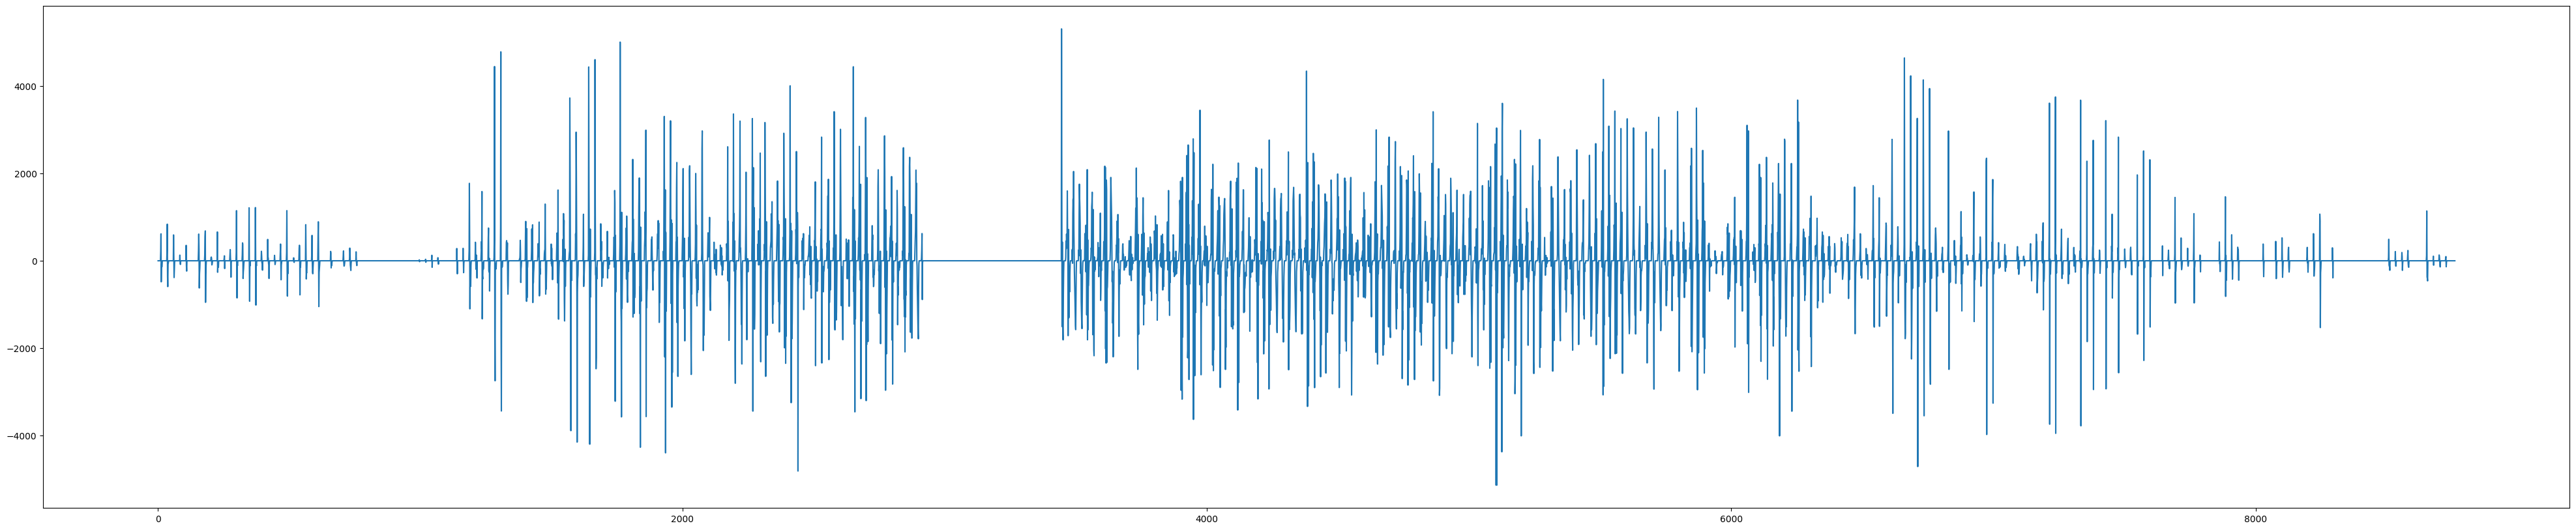

In [87]:
diff = df["SystemProduction"].diff()
plt.figure(figsize=(50,10))
diff[:10000].plot()
plt.show()

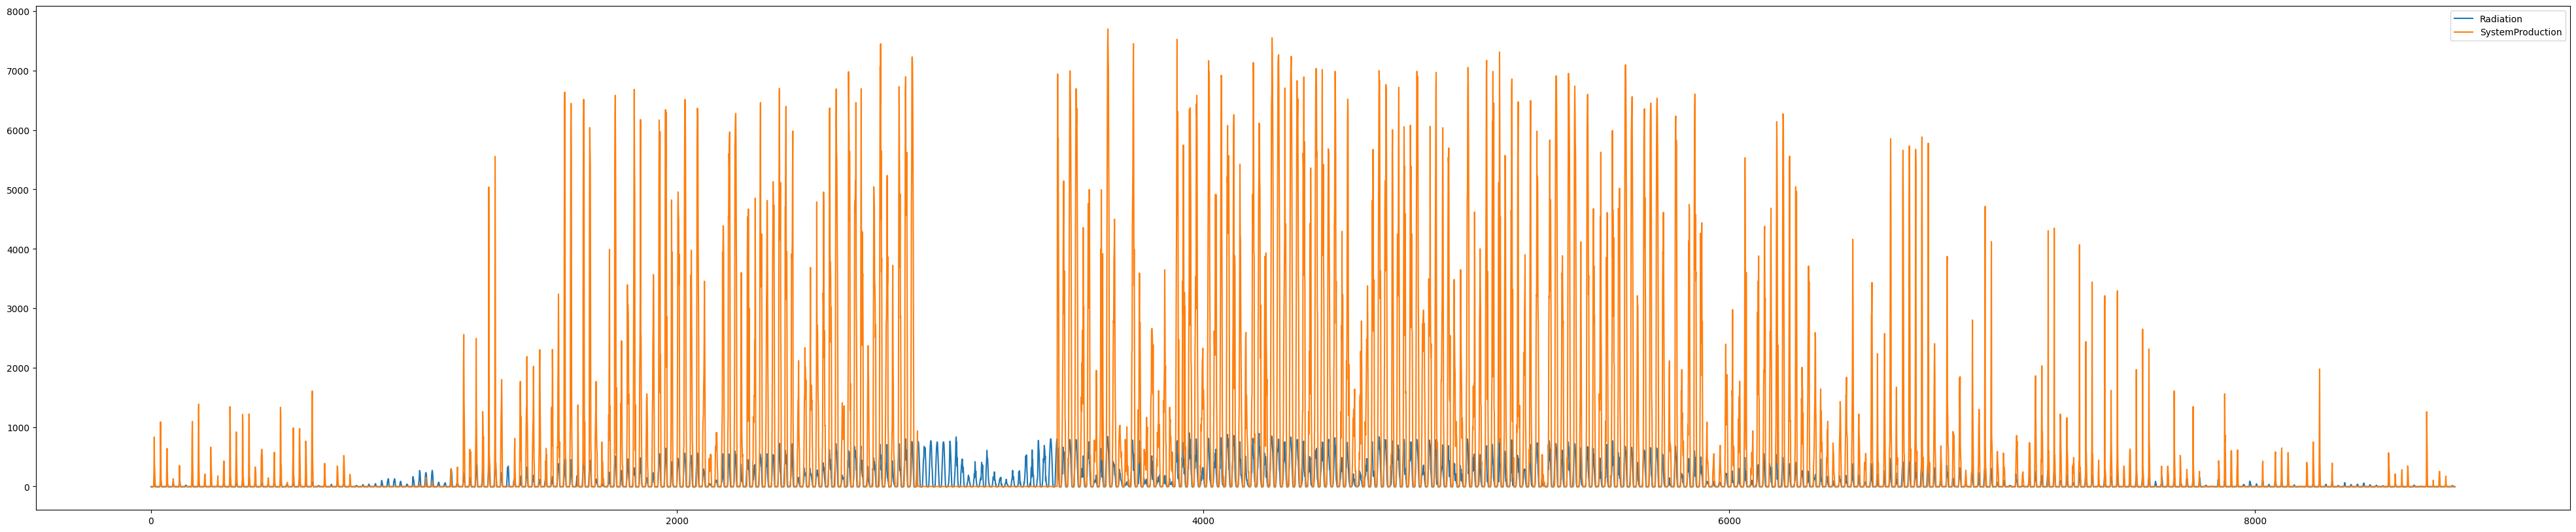

In [88]:
plt.figure(figsize=(50,10))

df['Radiation'][:10000].plot()
df['SystemProduction'][:10000].plot()
plt.legend(['Radiation', 'SystemProduction'])
plt.show()

In [89]:
import category_encoders as ce 

encoder = ce.OrdinalEncoder(cols=['date_season'])
df = encoder.fit_transform(df)
df.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Dates,Hour,Day,Month,Year,Season,Time,Humidity,date_year,date_month,date_hour,date_season
0,0.60000000,0,1003.80000000,-7.40000000,0.10000000,97,0.00000000,2017-01-01,0,1,1,2017,1,1,1,2017,1,1,1
1,1.70000000,0,1003.50000000,-7.40000000,-0.20000000,98,0.00000000,2017-01-01,1,1,1,2017,1,1,1,2017,1,1,1
2,0.60000000,0,1003.40000000,-6.70000000,-1.20000000,99,0.00000000,2017-01-01,2,1,1,2017,1,1,1,2017,1,1,1
3,2.40000000,0,1003.30000000,-7.20000000,-1.30000000,99,0.00000000,2017-01-01,3,1,1,2017,1,1,1,2017,1,1,1
4,4.00000000,0,1003.10000000,-6.30000000,3.60000000,67,0.00000000,2017-01-01,4,1,1,2017,1,1,1,2017,1,1,1


In [90]:
X = df.drop(['SystemProduction'],axis=1)
y = df['SystemProduction']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)       
X_train.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,Dates,Hour,Day,Month,Year,Season,Time,Humidity,date_year,date_month,date_hour,date_season
1098,1.40000000,0,1029.50000000,-4.60000000,-4.40000000,95,2017-02-15,18,15,2,2017,1,1,1,2017,2,15,1
4691,3.50000000,60,1014.80000000,732.70000000,20.30000000,55,2017-07-15,11,15,7,2017,3,2,2,2017,7,15,3
1872,2.50000000,0,997.80000000,-5.70000000,0.50000000,93,2017-03-20,0,20,3,2017,2,1,1,2017,3,20,2
127,1.10000000,0,1035.00000000,-5.50000000,-11.00000000,84,2017-01-06,7,6,1,2017,1,1,1,2017,1,6,1
5886,1.40000000,0,1021.00000000,-3.00000000,11.80000000,85,2017-09-03,6,3,9,2017,4,1,1,2017,9,3,4


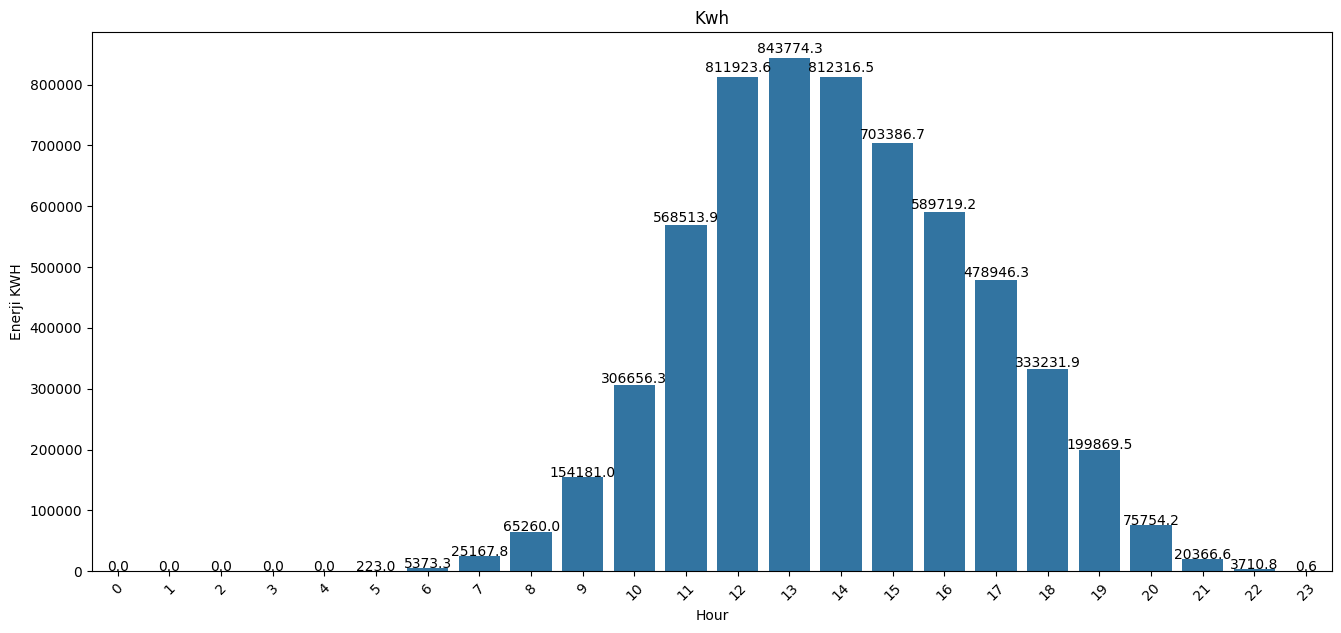

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

df_eda = df.copy()
plt.figure(figsize=(16,7))

# Group the data by 'Hour' and sum the 'SystemProduction'
hourly_production = df_eda.groupby(["Hour"])["SystemProduction"].sum().reset_index()

# Create a bar plot
a = sns.barplot(x=hourly_production["Hour"], y=hourly_production["SystemProduction"])

# Show values on the bars
show_values(a)

# Set plot labels and title
plt.xlabel("Hour")
plt.ylabel("Enerji KWH")
plt.xticks(rotation=45)
plt.title("Kwh")
plt.show()


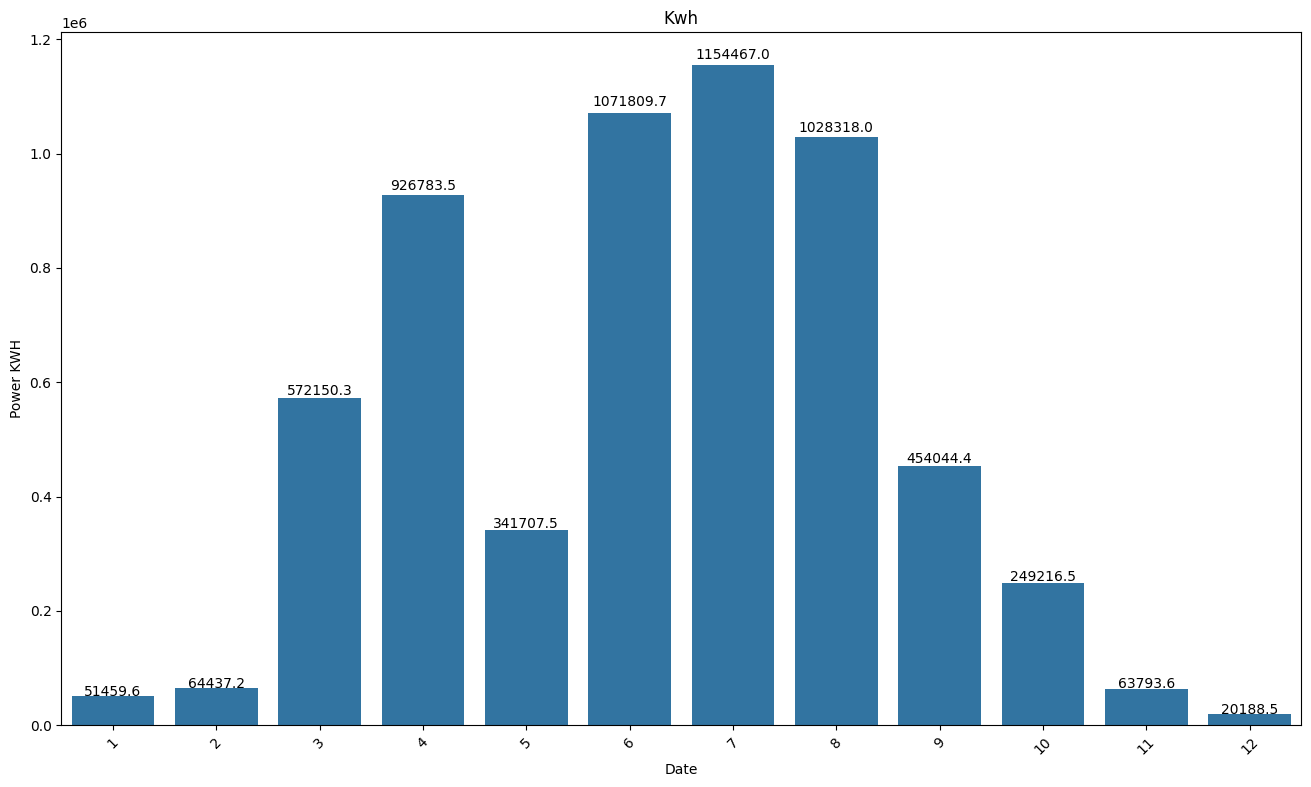

In [92]:
plt.figure(figsize=(16,9))
a=sns.barplot(x=df_eda.groupby(["Month"])["SystemProduction"].sum().index.to_list(),
            y=df_eda.groupby(["Month"])["SystemProduction"].sum())
show_values(a)
plt.xlabel("Date")
plt.ylabel("Power KWH")

plt.xticks(rotation=45)
plt.title("Kwh")
plt.show()

In [93]:

def df_analysis(data, x):
    df = data.copy()
    
    # Filter only numeric columns
    numeric_columns = data[x].select_dtypes(include='number').columns
    
    # Initialize the DataFrame for analysis
    df_analysis = pd.DataFrame(data[numeric_columns].mean(axis=0), columns=['mean'])
    df_analysis['min'] = data[numeric_columns].min(axis=0)
    df_analysis['max'] = data[numeric_columns].max(axis=0)
    df_analysis['std'] = data[numeric_columns].std(axis=0)
    df_analysis['med'] = data[numeric_columns].median(axis=0)
    df_analysis['nunique'] = data[numeric_columns].nunique(axis=0)
    df_analysis['nulls'] = data[numeric_columns].isnull().sum()
    df_analysis['zeros'] = (data[numeric_columns] == 0).astype(int).sum(axis=0)
    df_analysis['null_ratio'] = df_analysis['nulls'] / len(df)
    df_analysis['zero_ratio'] = df_analysis['zeros'] / len(df)
    
    return df_analysis

# Example usage
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05']
})
df['C'] = pd.to_datetime(df['C'])

# Apply the analysis function
df_analysis_result = df_analysis(df, df.columns)
print(df_analysis_result)


         mean  min  max         std         med  nunique  nulls  zeros  \
A  3.00000000    1    5  1.58113883  3.00000000        5      0      0   
B 30.00000000   10   50 15.81138830 30.00000000        5      0      0   

   null_ratio  zero_ratio  
A  0.00000000  0.00000000  
B  0.00000000  0.00000000  


In [94]:

# Example DataFrame (replace this with your actual DataFrame)
df = pd.DataFrame({
    'WindSpeed': [5, 7, 3],
    'Sunshine': [10, 20, 15],
    'AirPressure': [1012, 1010, 1015],
    'Radiation': [200, 250, 300],
    'AirTemperature': [20, 22, 19],
    'RelativeAirHumidity': [50, 55, 60],
    'SystemProduction': [500, 600, 550]
})

# Check the existing columns
print("Existing columns in DataFrame:")
print(df.columns)

# Ensure the columns you want to select exist
selected_columns = ['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']

# Check if the selected columns are in the DataFrame
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
    print(f"These columns are missing: {missing_columns}")
else:
    df_final = df[selected_columns]
    print("DataFrame with selected columns:")
    print(df_final.head())


Existing columns in DataFrame:
Index(['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature',
       'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')
DataFrame with selected columns:
   WindSpeed  Sunshine  AirPressure  Radiation  AirTemperature  \
0          5        10         1012        200              20   
1          7        20         1010        250              22   
2          3        15         1015        300              19   

   RelativeAirHumidity  SystemProduction  
0                   50               500  
1                   55               600  
2                   60               550  


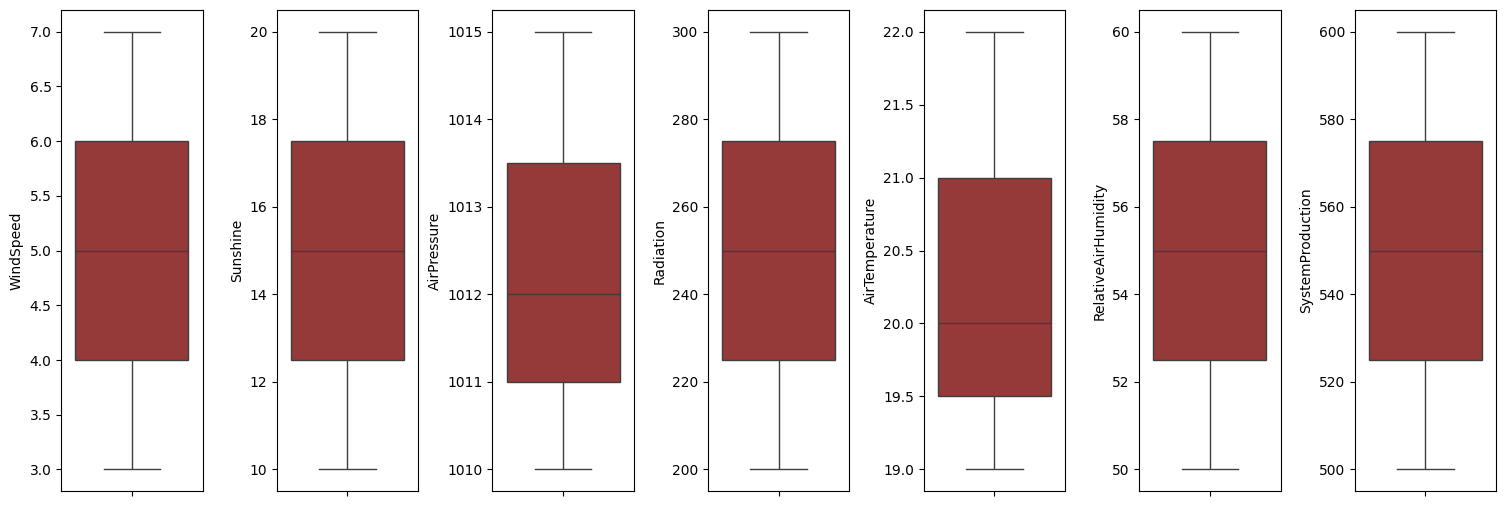

In [95]:
numerical = df_final[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']]

fig,axis=plt.subplots(ncols=7,nrows=1,figsize=(15,5))
index=0
axis=axis.flatten()

for col,values in numerical.items():
    sns.boxplot(y=col,data=numerical,color='Brown',ax=axis[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [96]:
upper_limit = df_final[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']].quantile(0.90)
upper_limit
 
lower_limit = df_final[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']].quantile(0.10)
lower_limit

WindSpeed                3.40000000
Sunshine                11.00000000
AirPressure           1010.40000000
Radiation              210.00000000
AirTemperature          19.20000000
RelativeAirHumidity     51.00000000
SystemProduction       510.00000000
Name: 0.1, dtype: float64

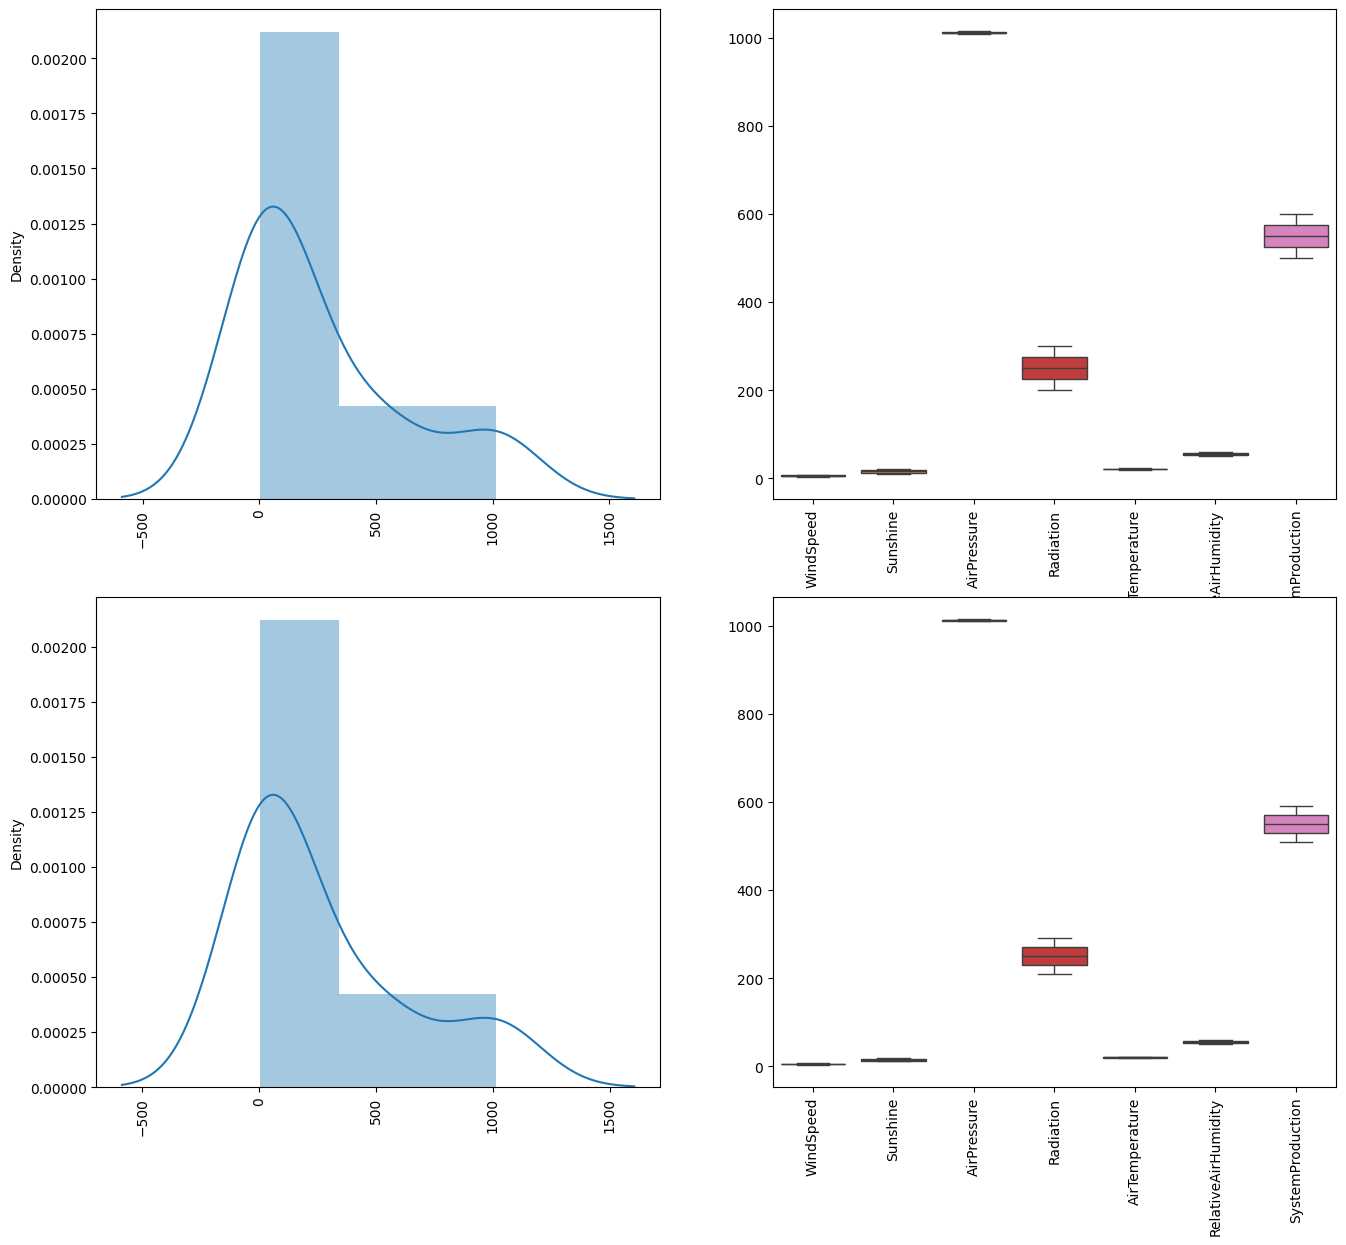

In [97]:
# Capping --> Winsorization
new_solar_cap = df.copy()
new_solar_cap[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']] = np.where(
    new_solar_cap[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']] > upper_limit, upper_limit,
    np.where(new_solar_cap[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']] < lower_limit, lower_limit,
             new_solar_cap[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']]))
df_final['WindSpeed'].describe()
 
# Comparing
plt.figure(figsize=(16,14))
plt.subplot(2,2,1)
sns.distplot(df_final[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(df_final[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']])
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.distplot(new_solar_cap[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']])
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(new_solar_cap[['WindSpeed','Sunshine','AirPressure','Radiation','AirTemperature','RelativeAirHumidity','SystemProduction']]);
plt.xticks(rotation=90);

In [98]:
X = df_final.drop(['SystemProduction'],axis=1)
y = df_final['SystemProduction']

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Linear Regression (OLS)
import statsmodels.api as sm

# build a full model using OLS()
linreg_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:       SystemProduction   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.996
Method:                 Least Squares   F-statistic:                           0.001890
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                       0.972
Time:                        06:12:38   Log-Likelihood:                         -15.547
No. Observations:                   2   AIC:                                      33.09
Df Residuals:                       1   BIC:                                      31.79
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5625.0


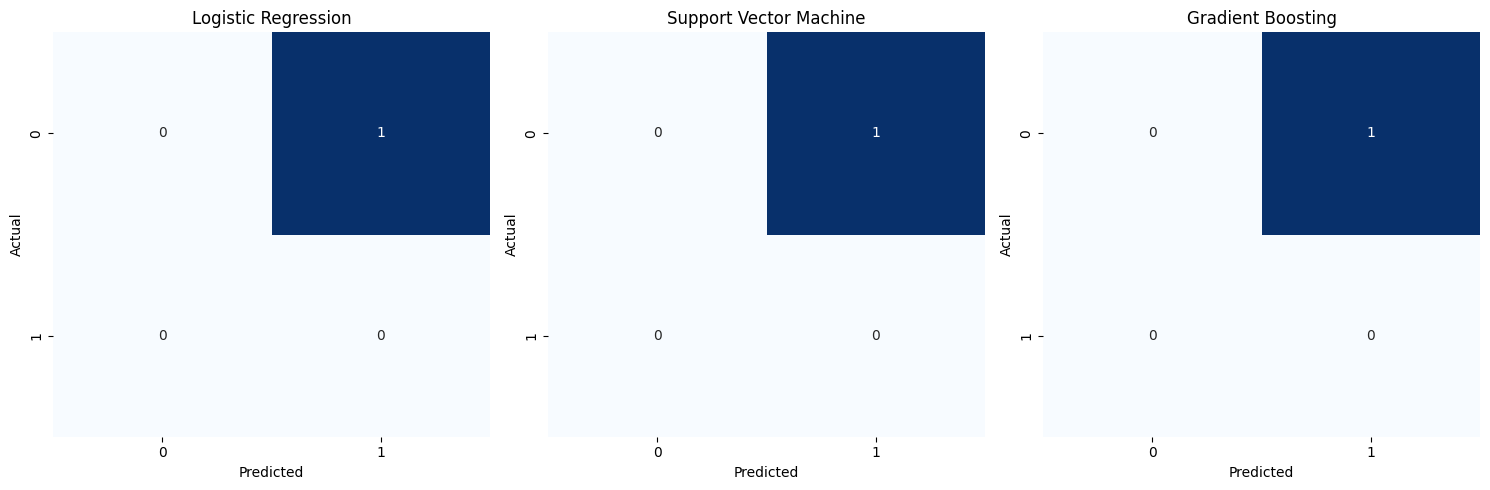

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Instantiate models
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

# Create confusion matrices
logistic_cm = confusion_matrix(y_test, logistic_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
gradient_boosting_cm = confusion_matrix(y_test, gradient_boosting_pred)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(logistic_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(gradient_boosting_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
